In [31]:
import pandas as pd
oms_df = pd.read_csv("../data/intermediate/oms.csv")

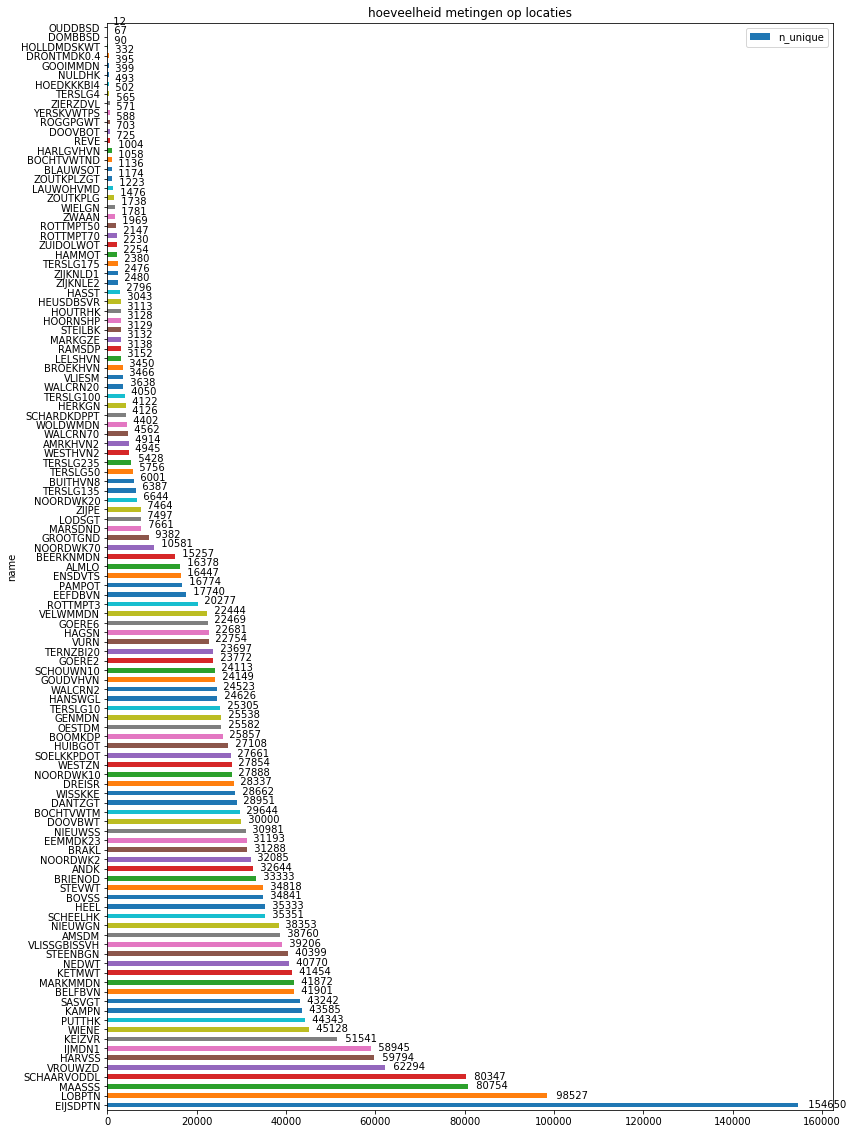

In [3]:
%matplotlib inline
ax = oms_df[oms_df.type=='LOCOMS'].sort_values('n_unique', ascending=False).plot.\
    barh('name', 'n_unique', figsize=(13,20), title="hoeveelheid metingen op locaties")

for p in ax.patches:
    ax.annotate("  " + str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

# Kaarten

In [ ]:
!mkdir -p ../doc/kaart/
!wget -nc http://imergis.nl/shp/2018-Imergis_provinciegrenzen_kustlijn-shp.zip -O ../doc/kaart/2018-Imergis_provinciegrenzen_kustlijn-shp.zip
!unzip ../doc/kaart/2018-Imergis_provinciegrenzen_kustlijn-shp.zip -d ../doc/kaart/ #2018-Imergis_provinciegrenzen_kustlijn.shp

No cigar..

In [5]:
import geopandas as gpd
import pandas as pd

pdf = pd.read_csv("../data/intermediate/comb_interests_1.csv")  # Matches, hopefully, but quite possibly not.
nld =  gpd.read_file("../doc/data/2018-Waterschappen/2018-Waterschappen.shp")

#nld = gpd.read_file("../doc/kaart/2018-Imergis_provinciegrenzen_kustlijn.shp")#../doc/data/2018-Waterschappen/2018-Waterschappen.shp")

#%matplotlib inline
#nld.plot()

In [45]:
pos = ['LOC', 'PLT:X', 'PLT:Y']
loc_df = [[loc,x/100,y/100, len(cdf), cdf.Ql.mean(),
           oms_df[(oms_df.type=='LOCOMS') & (oms_df.name==loc)].desc.asobject[0]]
          for (loc,x,y),cdf in pdf.groupby(pos)]
loc_df = pd.DataFrame(loc_df, columns=['loc', 'x', 'y', 'cnt', 'Ql', 'desc'])

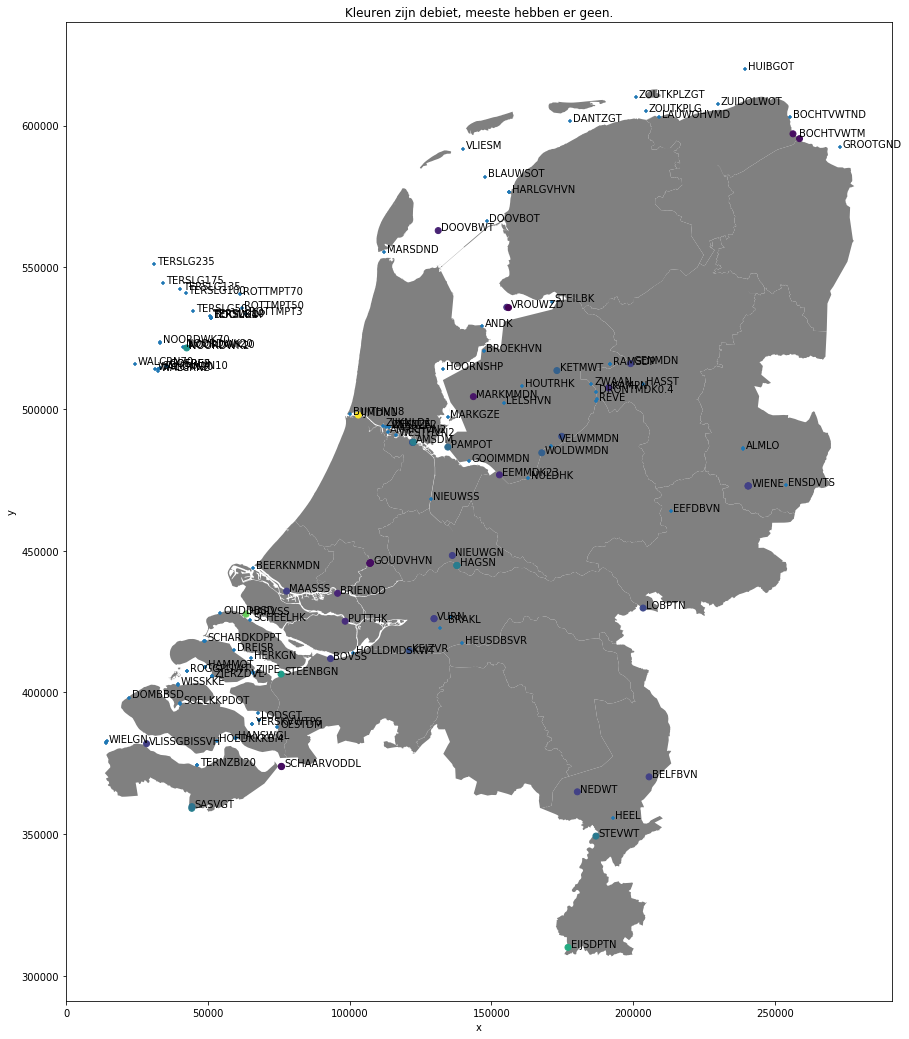

In [50]:
ax = nld.plot(color='grey', figsize=(18,18))

loc_df[loc_df.Ql.isna()].plot.scatter('x','y', marker='+', ax=ax)

tmp = loc_df[~loc_df.Ql.isna()]
ax.scatter(tmp.x, tmp.y, c=tmp.Ql)
ax.set_title('Kleuren zijn debiet, meeste hebben er geen.')

for k,cdf in loc_df.groupby('loc'):
    ax.text(cdf.x.mean()+1000, cdf.y.mean(), k)

#oms_df[(oms_df.type=='LOCOMS') & (oms_df.n_unique > 20000)].plot.scatter(ax=ax)

Wat opvolgende locaties waarschijnlijk upstream van elkaar:
(Opmerking: komt niet overeen met gebieden?)

In [ ]:
[['BEERKNMDN', 'MAASSS', ['BRIENOD', 'PUTTHK']],
 ['WIELGN', 'VLISSGBISSVH', 'HOEDKKKBI4', 'TERNZBI20', 'SCHAARVODDL']
]